## CIFAR10_CNN_실습

※ CIFAR10 이외에도, 다양한 데이터셋 찾아보고 학습해봅시다.

참고 : https://pytorch.org/vision/stable/datasets.html

In [1]:
# 필요 라이브러리 import
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # cuda device 설정!!

# 시드 고정
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

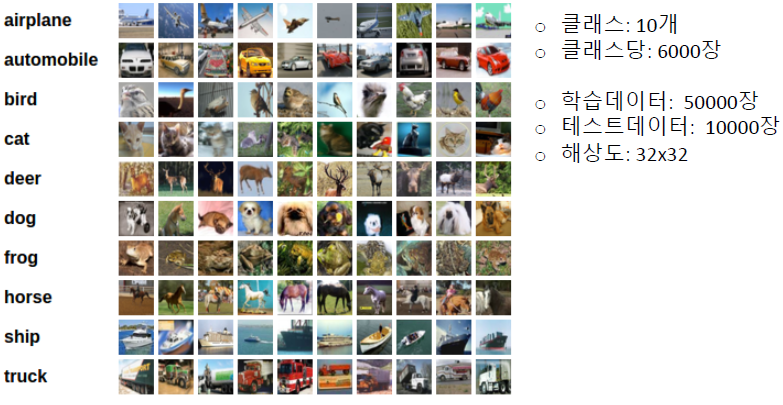

In [3]:
# CIFAR10 dataset

############################### 1번 ######################################
# CIFAR 10 데이터셋을 불러오자

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform = transforms.ToTensor())

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform = transforms.ToTensor())


##########################################################################

classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
# dataset loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

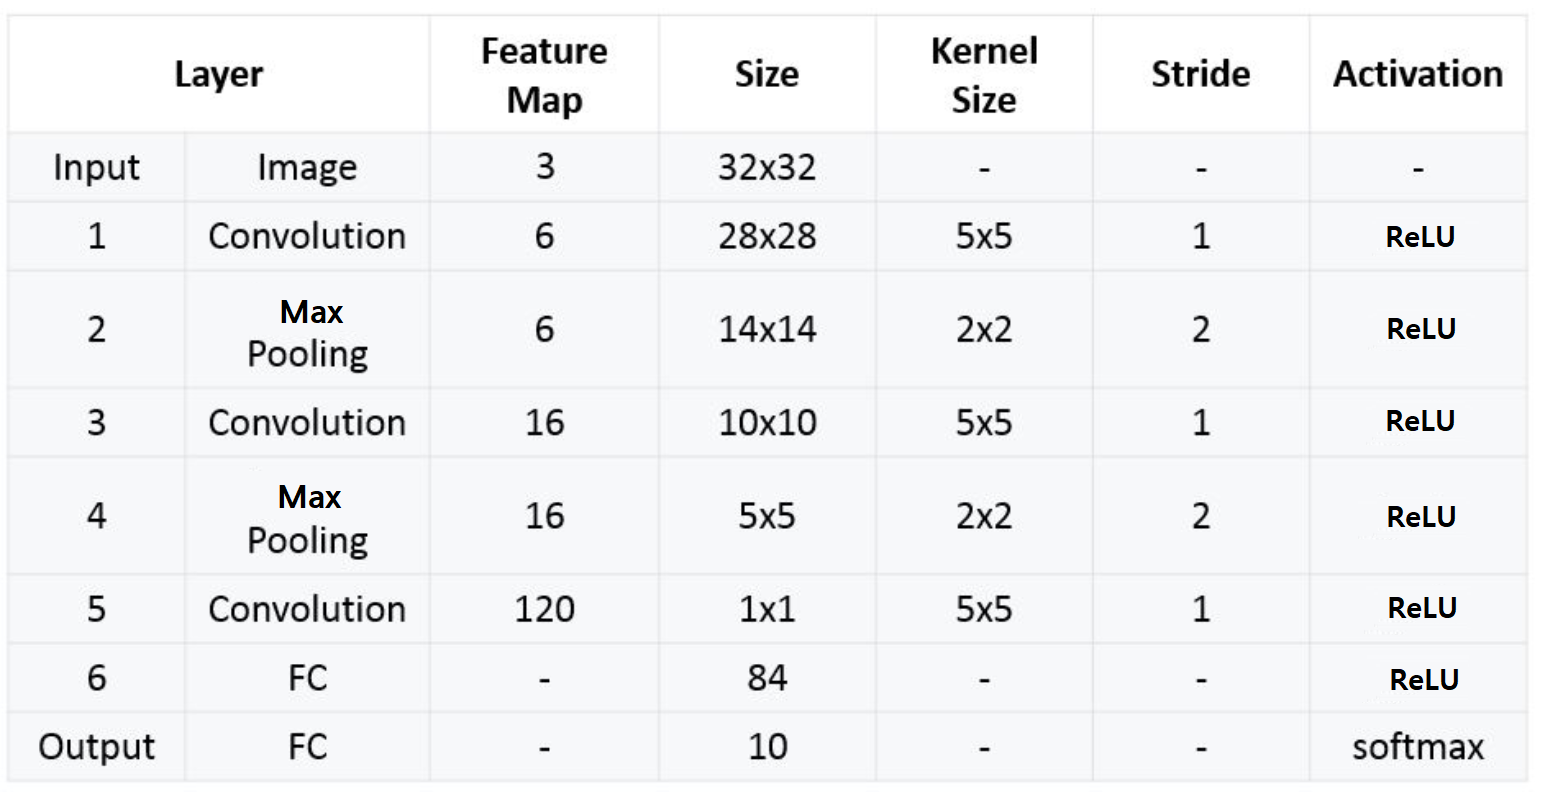

In [5]:
# 가이드라인 참고해서 CNN 모델 생성

############################### 2번 ######################################


class Net(torch.nn.Module):
  def __init__(self):
    super(Net,self).__init__()

    self.c1 = torch.nn.Conv2d(3,6,kernel_size=5,stride=1,padding=0) # RGB 채널 유의! (x3)
    self.x1 = torch.nn.ReLU()
    self.s2 = torch.nn.MaxPool2d(kernel_size=2,stride=2)

    self.c3 = torch.nn.Conv2d(6,16,kernel_size=5,stride=1,padding=0)
    self.x3 = torch.nn.ReLU()
    self.s4 = torch.nn.MaxPool2d(kernel_size=2,stride=2) 

    self.f5 = torch.nn.Linear(16*5*5,120,bias=True)
    self.x5 = torch.nn.ReLU()
    
    self.f6 = torch.nn.Linear(120,84,bias=True)
    self.x6 = torch.nn.ReLU()
    
    self.output = torch.nn.Linear(84,10,bias=True)


  def forward(self,x):
    out = self.c1(x)
    out = self.x1(out)
    out = self.s2(out)
    out = self.c3(out)
    out = self.x3(out)
    out = self.s4(out)        
    out = out.view(out.size(0),-1)
    out = self.f5(out)
    out = self.x5(out)
    out = self.f6(out)    
    out = self.x6(out)
    out = self.output(out)  

    return out


##########################################################################


In [6]:
model = Net().to(device)

print(model)

Net(
  (c1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (x1): ReLU()
  (s2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (x3): ReLU()
  (s4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (f5): Linear(in_features=400, out_features=120, bias=True)
  (x5): ReLU()
  (f6): Linear(in_features=120, out_features=84, bias=True)
  (x6): ReLU()
  (output): Linear(in_features=84, out_features=10, bias=True)
)


In [7]:
# parameters
learning_rate = 0.1
training_epochs = 10

In [8]:
# MNIST는 다중분류 -> CrossEntropyLoss
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
# train

total_batch = len(train_loader)

for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in train_loader:
        X = X.to(device)
        Y = Y.to(device)

        ############## 3번 ############
        # H(x) 계산
        hypothesis = model(X)

        # cost 계산
        cost = criterion(hypothesis, Y)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        ###############################

        avg_cost += cost / total_batch

    print('[Epoch: {:>2}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:  1] cost = 2.09646297
[Epoch:  2] cost = 1.68366432
[Epoch:  3] cost = 1.47986412
[Epoch:  4] cost = 1.37004113
[Epoch:  5] cost = 1.29337287
[Epoch:  6] cost = 1.23249829
[Epoch:  7] cost = 1.17902052
[Epoch:  8] cost = 1.130041
[Epoch:  9] cost = 1.08371162
[Epoch: 10] cost = 1.05236077


In [10]:
accuracy = 0
total_batch = len(test_loader)

with torch.no_grad():
    model.eval()

    for X, Y in test_loader:
        X = X.to(device)
        Y = Y.to(device)
        
        prediction = model(X)
        correct_prediction = torch.argmax(prediction, 1) == Y
        accuracy += correct_prediction.float().mean()

print('Accuracy:', accuracy.item()/total_batch)

Accuracy: 0.5459792993630573


#### 정확도를 높일 수 있는 방법을 고민해보자!

방법은 있지만, 정답은 없습니다. 좋은 결과를 내기 위해서는 여러분들 스스로의 노력이 필요하다고 생각합니다. 파라미터 값도 변경해보고, 배치사이즈도 수정해보고, training epoch 값도 변경해보고, optimizer 함수도 바꿔보고, 기타 등등 수없이 많은 방법들이 있을거라 생각합니다. 구글링이나 공식 홈페이지 document 등을 찾아보며 각자 공부해봅시다 :)

### 정답 코드

In [11]:
# 1번
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [12]:
# 2번

class Net(torch.nn.Module):
  def __init__(self):
    super(Net,self).__init__()

    self.c1 = torch.nn.Conv2d(3,6,kernel_size=5,stride=1,padding=0) # RGB 채널 유의! (x3)
    self.x1 = torch.nn.ReLU()
    self.s2 = torch.nn.MaxPool2d(kernel_size=2,stride=2)

    self.c3 = torch.nn.Conv2d(6,16,kernel_size=5,stride=1,padding=0)
    self.x3 = torch.nn.ReLU()
    self.s4 = torch.nn.MaxPool2d(kernel_size=2,stride=2) 

    self.f5 = torch.nn.Linear(16*5*5,120,bias=True)
    self.x5 = torch.nn.ReLU()
    
    self.f6 = torch.nn.Linear(120,84,bias=True)
    self.x6 = torch.nn.ReLU()
    
    self.output = torch.nn.Linear(84,10,bias=True)


  def forward(self,x):
    out = self.c1(x)
    out = self.x1(out)
    out = self.s2(out)
    out = self.c3(out)
    out = self.x3(out)
    out = self.s4(out)        
    out = out.view(out.size(0),-1) # batch x 1 x 1 x 120  
    out = self.f5(out)
    out = self.x5(out)
    out = self.f6(out)    
    out = self.x6(out)
    out = self.output(out)  

    return out

In [13]:
# 3번

# H(x) 계산
hypothesis = model(X)
# cost 계산
cost = criterion(hypothesis, Y)

# cost로 H(x) 개선
optimizer.zero_grad()
cost.backward()
optimizer.step()